In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [14]:
print(df.age.max())
print(df.age.min())
print(df.age.max() - df.age.min())
print(df.age.mean())
print(df.age.std())
print(type(df.age[0]))

98
17
81
40.02406040594348
10.421249980934244
<class 'numpy.int64'>


In [23]:
jobs = df.job.unique()
jobs

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [25]:
for job in jobs:
    print(f'{job}: {df[df.job == job].shape[0] / df.shape[0]}')

blue-collar: 0.2246770904146839
technician: 0.1637127318636496
management: 0.07099155093716616
services: 0.09636301835486064
retired: 0.04175973584539186
admin.: 0.25303486452364765
housemaid: 0.025735651160532193
unemployed: 0.024618821015829854
entrepreneur: 0.03535010197144799
self-employed: 0.03450033990482665
unknown: 0.008012042342429833
student: 0.02124405166553365


In [27]:
marital = df.marital.unique()
marital

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [29]:
for status in marital:
    print(f'{status}: {df[df.marital==status].shape[0] / df.shape[0]}')

married: 0.6052248227639119
single: 0.28085850247644945
divorced: 0.11197436146450422
unknown: 0.0019423132951345051


In [31]:
education = df.education.unique()
education

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [32]:
for level in education:
    print(f'{level}: {df[df.education==level].shape[0] / df.shape[0]}')

basic.4y: 0.10138875400602117
unknown: 0.042026803923472855
university.degree: 0.29542585218995826
high.school: 0.23101388754006022
basic.9y: 0.14676604836360105
professional.course: 0.12729435757987764
basic.6y: 0.055647275905603574
illiterate: 0.0004370204914052637


In [34]:
# default -- has creit in default (unpaid)
default = df.default.unique()
default

array(['unknown', 'no', 'yes'], dtype=object)

In [39]:
def print_percent_class(df, col):
    for level in df[col].unique():
        print(f'{level}: {df[df[col]==level].shape[0] / df.shape[0]}')

In [40]:
print_percent_class(df, 'default')

unknown: 0.20872584247839177
no: 0.7912013207730407
yes: 7.283674856754395e-05


In [41]:
print_percent_class(df,'housing')

yes: 0.5238418956977761
no: 0.4521219772749345
unknown: 0.0240361270272895


In [42]:
print_percent_class(df, 'loan')

no: 0.8242692046227057
yes: 0.15169466835000486
unknown: 0.0240361270272895


In [43]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

In [44]:
print_percent_class(df, 'education')

Basic: 0.3038020782752258
unknown: 0.042026803923472855
university.degree: 0.29542585218995826
high.school: 0.23101388754006022
professional.course: 0.12729435757987764
illiterate: 0.0004370204914052637


In [45]:
df = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]

In [46]:
df.head()

,age,job,marital,education,default,housing,loan,y
0,44,blue-collar,married,Basic,unknown,yes,no,0
1,53,technician,married,unknown,no,no,no,0
2,28,management,single,university.degree,no,yes,no,1
3,39,services,married,high.school,no,no,no,0
4,55,retired,married,Basic,no,yes,no,1


In [47]:
df.groupby('job').mean()

,age,y
job,,
admin.,38.187296,0.129726
blue-collar,39.555760,0.068943
entrepreneur,41.723214,0.085165
housemaid,45.500000,0.100000
management,42.362859,0.112175
retired,62.027326,0.252326
self-employed,39.949331,0.104856
services,37.926430,0.081381
student,25.894857,0.314286


In [48]:
df.groupby('marital').mean()

,age,y
marital,,
divorced,44.899393,0.103209
married,42.307165,0.101573
single,33.158714,0.140041
unknown,40.275000,0.150000


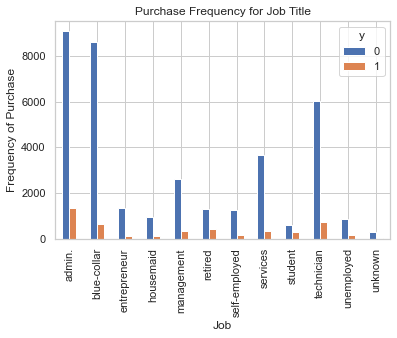

In [49]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [ ]:
cat_vars=['job','marital','education','default','housing','loan']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
cat_vars=['job','marital','education','default','housing','loan']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]